# **Hands-on Activity 11.1 Linear Regression Analysis**
| Course: CPE 311 | Program: BSCpE |
|--- | --- |
| **Course Title**: Computational Thinking with Python | **Date Performed:** April 27 , 2024 |
| **Section:** BSCPE22S3 | **Date Submitted:** April 28, 2024 |
| **Student Name**: John Louie V. Adornado | **Instructor's Name:** Engr. Roman Richard |

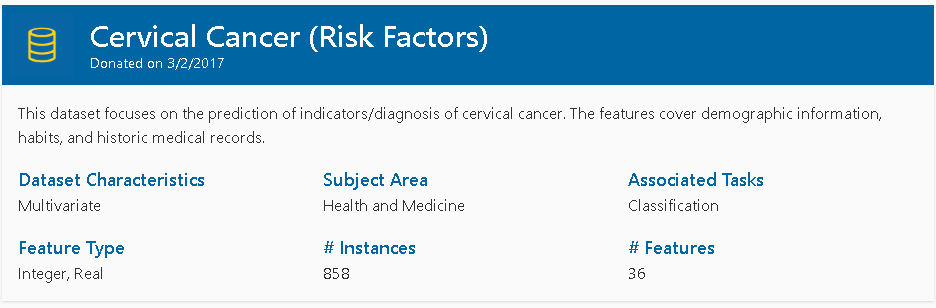

In [1]:
pip install ucimlrepo

In [2]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [5]:
df = pd.concat([X, y], axis = 1)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.00,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [8]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [11]:
small_missing_cols = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                      'Smokes (years)', 'Smokes (packs/year)']
for col in small_missing_cols:
    if df[col].dtype == 'object':
        # For categorical columns, fill missing values with the mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with the median
        df[col].fillna(df[col].median(), inplace=True)


In [13]:
small_missing_cols = ['Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)',
                      'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                      'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                      'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
                      'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']
for col in small_missing_cols:
    if df[col].dtype == 'object':
        # For categorical columns, fill missing values with the mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with the median
        df[col].fillna(df[col].median(), inplace=True)


In [15]:
# Drop columns with a large number of missing values
large_missing_cols = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
df.drop(large_missing_cols, axis=1, inplace=True)


In [16]:
print(df.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [17]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [28]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# **Exploratory Data Analysis(EDA)**

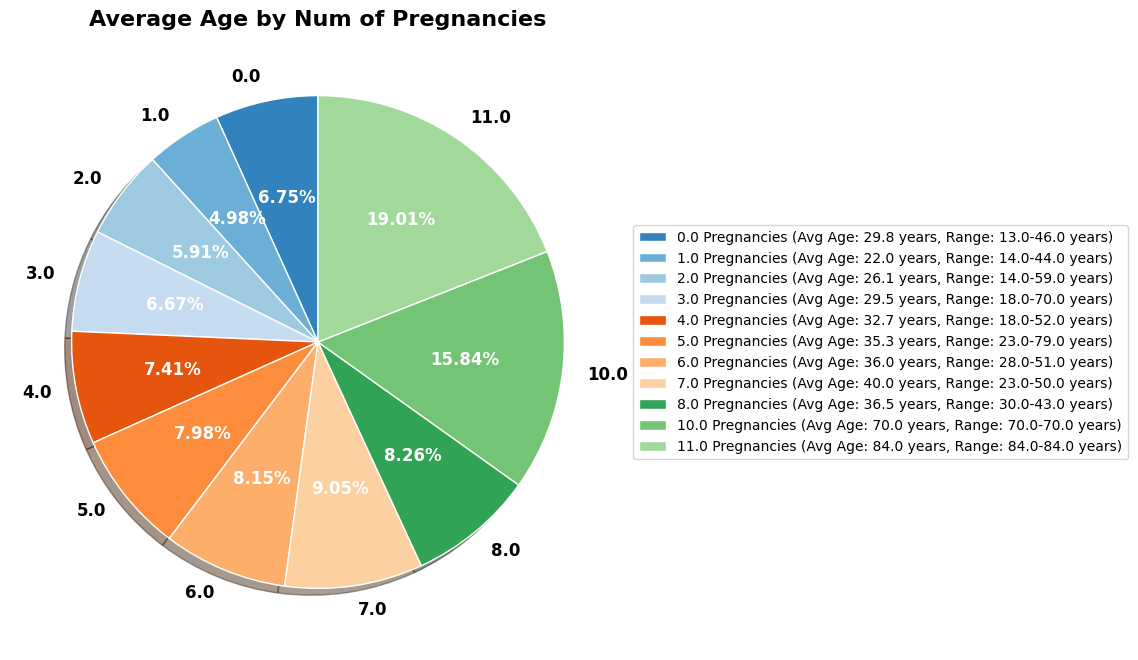

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby('Num of pregnancies')['Age'].agg(['mean', 'min', 'max']).reset_index()
colors = plt.cm.tab20c(range(len(grouped_data)))
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(grouped_data['mean'], labels=grouped_data['Num of pregnancies'], colors=colors,
                                   autopct='%.2f%%', shadow=True, startangle=90)
plt.setp(texts, size=12, weight="bold", color='black')
plt.setp(autotexts, size=12, weight="bold", color='white')
for wedge in wedges:
    wedge.set_edgecolor('white')
legend_labels = [f'{preg} Pregnancies (Avg Age: {age:.1f} years, Range: {min_age:.1f}-{max_age:.1f} years)'
                 for preg, age, min_age, max_age in zip(grouped_data['Num of pregnancies'],
                                                          grouped_data['mean'],
                                                          grouped_data['min'],
                                                          grouped_data['max'])]
plt.legend(legend_labels, loc='center left', fontsize=10, bbox_to_anchor=(1, 0.5))
plt.title('Average Age by Num of Pregnancies', fontsize=16, weight='bold')
ax.set_aspect('equal')
plt.show()


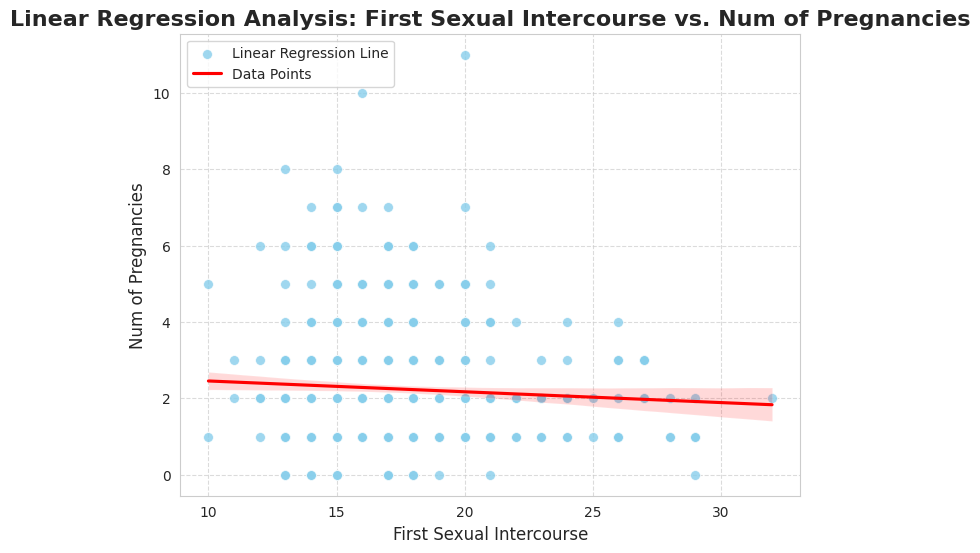

In [48]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='First sexual intercourse', y='Num of pregnancies', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='First sexual intercourse', y='Num of pregnancies', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: First Sexual Intercourse vs. Num of Pregnancies', fontsize=16, weight='bold')
plt.xlabel('First Sexual Intercourse', fontsize=12)
plt.ylabel('Num of Pregnancies', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Linear Regression Line', 'Data Points'], loc='upper left')
plt.show()



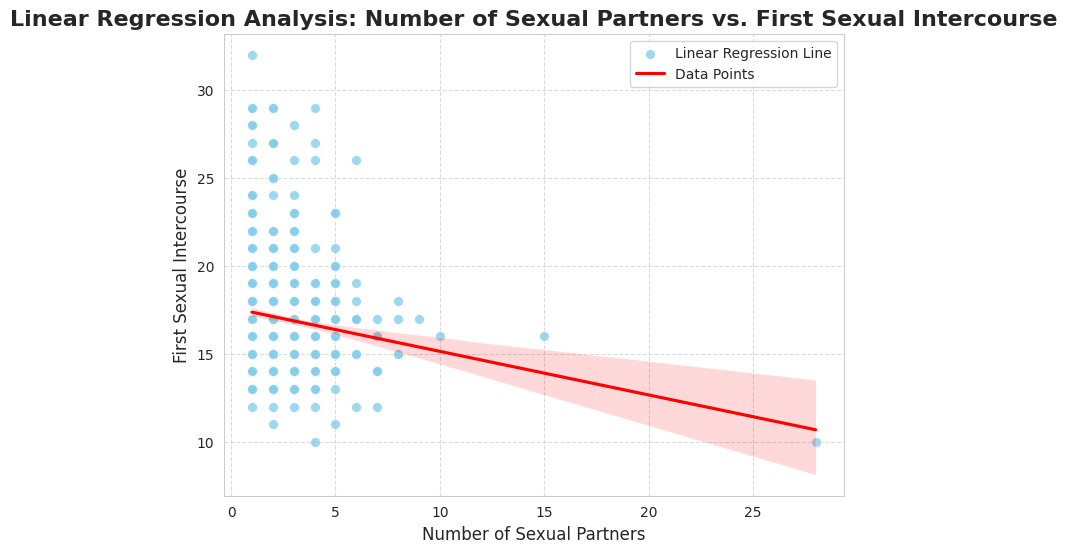

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Number of sexual partners', y='First sexual intercourse', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='Number of sexual partners', y='First sexual intercourse', scatter=False, color='red', ax=ax)
plt.title('Linear Regression Analysis: Number of Sexual Partners vs. First Sexual Intercourse', fontsize=16, weight='bold')
plt.xlabel('Number of Sexual Partners', fontsize=12)
plt.ylabel('First Sexual Intercourse', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Linear Regression Line', 'Data Points'], loc='upper right')
plt.show()

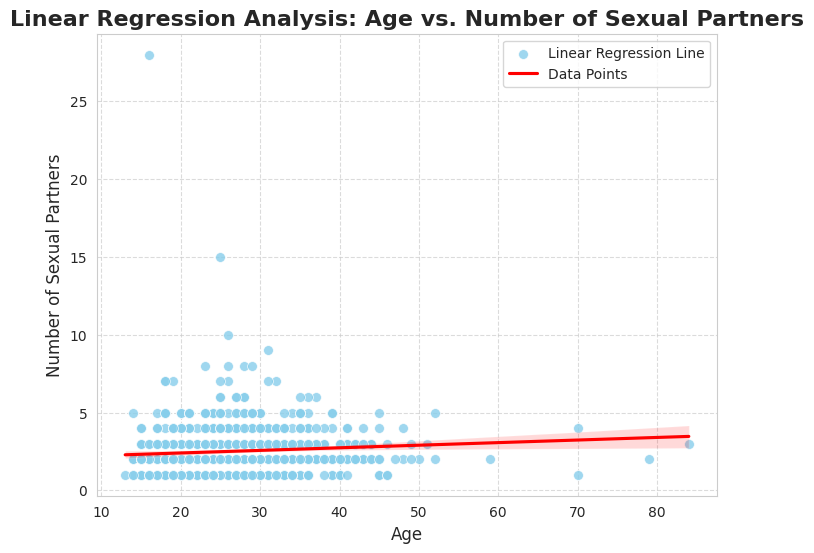

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Number of sexual partners', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='Age', y='Number of sexual partners', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: Age vs. Number of Sexual Partners', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Sexual Partners', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Linear Regression Line', 'Data Points'], loc='upper right')
plt.show()


<ipython-input-63-ffeb28b4eb0e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


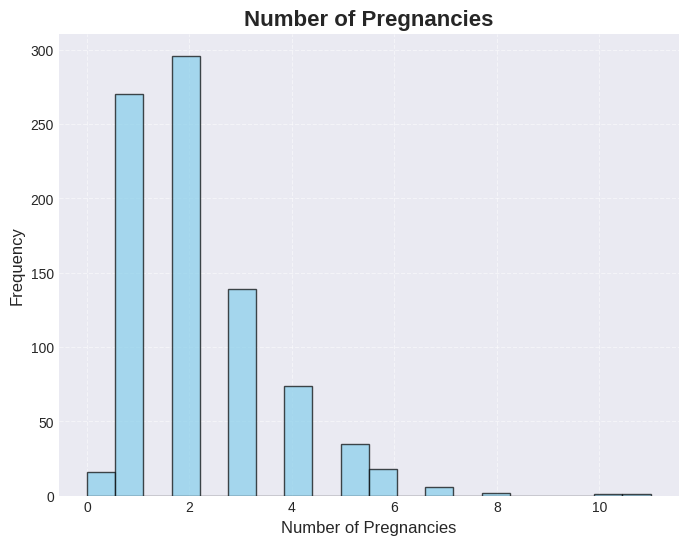

In [63]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
df['Num of pregnancies'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)

plt.title('Number of Pregnancies', fontsize=16, weight='bold')
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


<ipython-input-64-b3e75e74aec8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


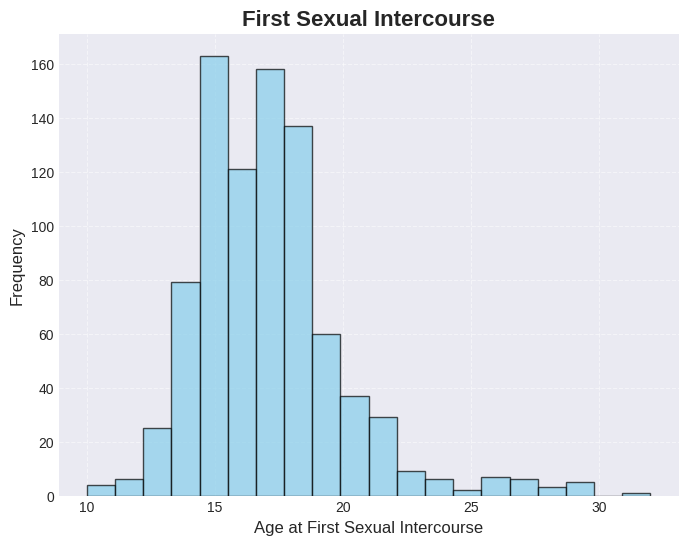

In [64]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
df['First sexual intercourse'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)

plt.title('First Sexual Intercourse', fontsize=16, weight='bold')
plt.xlabel('Age at First Sexual Intercourse', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<ipython-input-65-80185e5cf9b6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


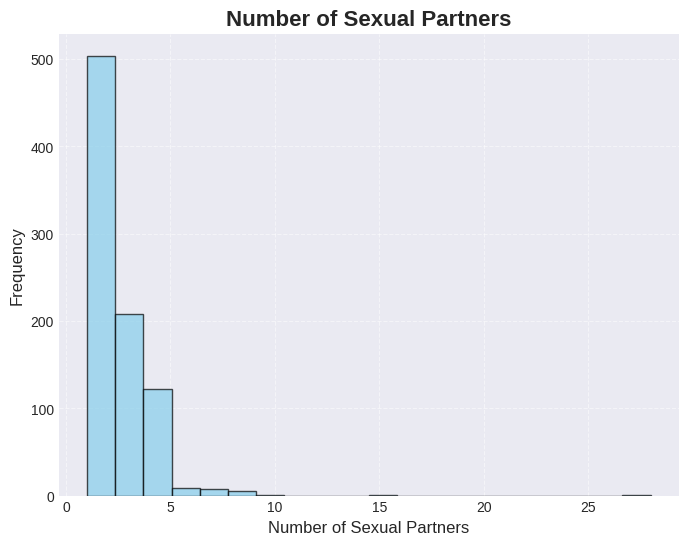

In [65]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
df['Number of sexual partners'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)

plt.title('Number of Sexual Partners', fontsize=16, weight='bold')
plt.xlabel('Number of Sexual Partners', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<ipython-input-66-98095f1409d0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


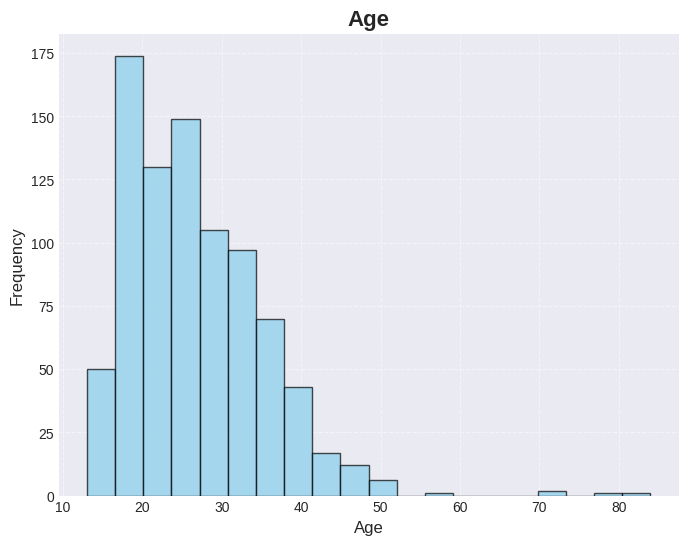

In [66]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
df['Age'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)

plt.title('Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


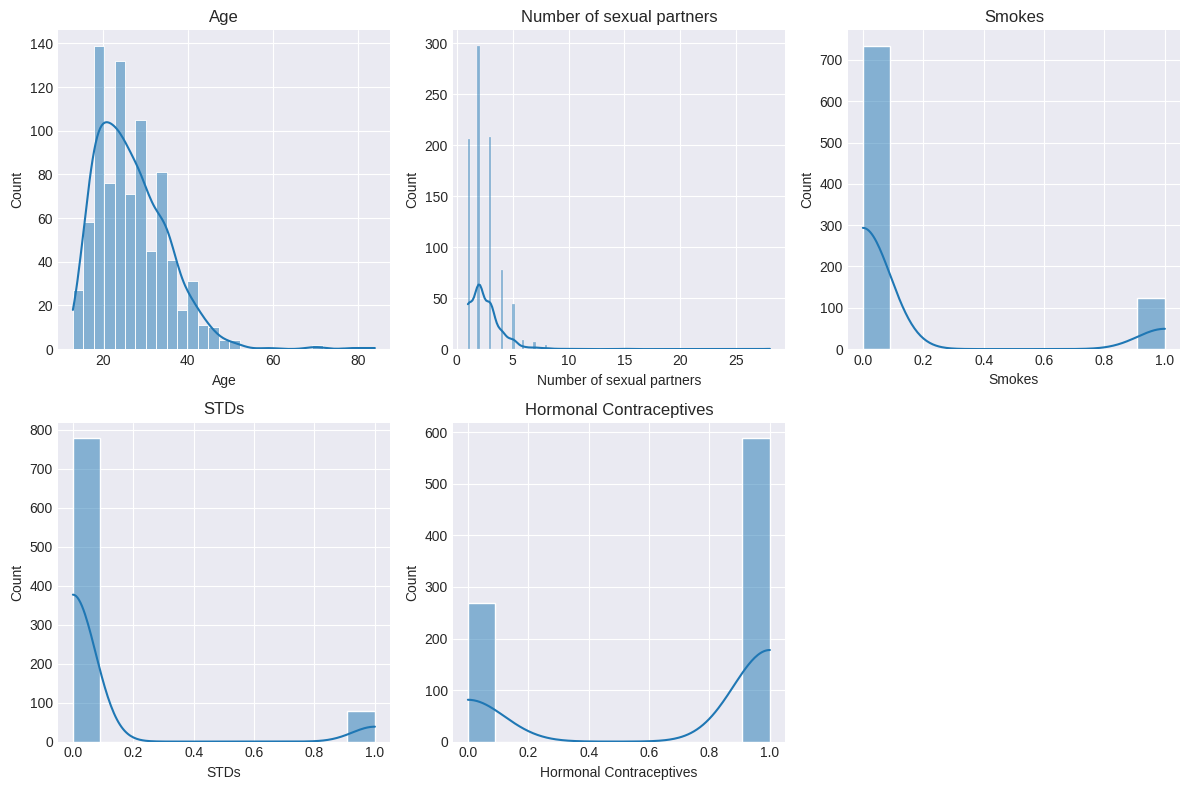

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the important variables
important_variables = ['Age', 'Number of sexual partners', 'Smokes', 'STDs', 'Hormonal Contraceptives']

# Subset the dataframe
selected_df = df[important_variables]

# Plot histograms for each variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(selected_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(selected_df[variable], kde=True)
    plt.title(variable)
plt.tight_layout()
plt.show()


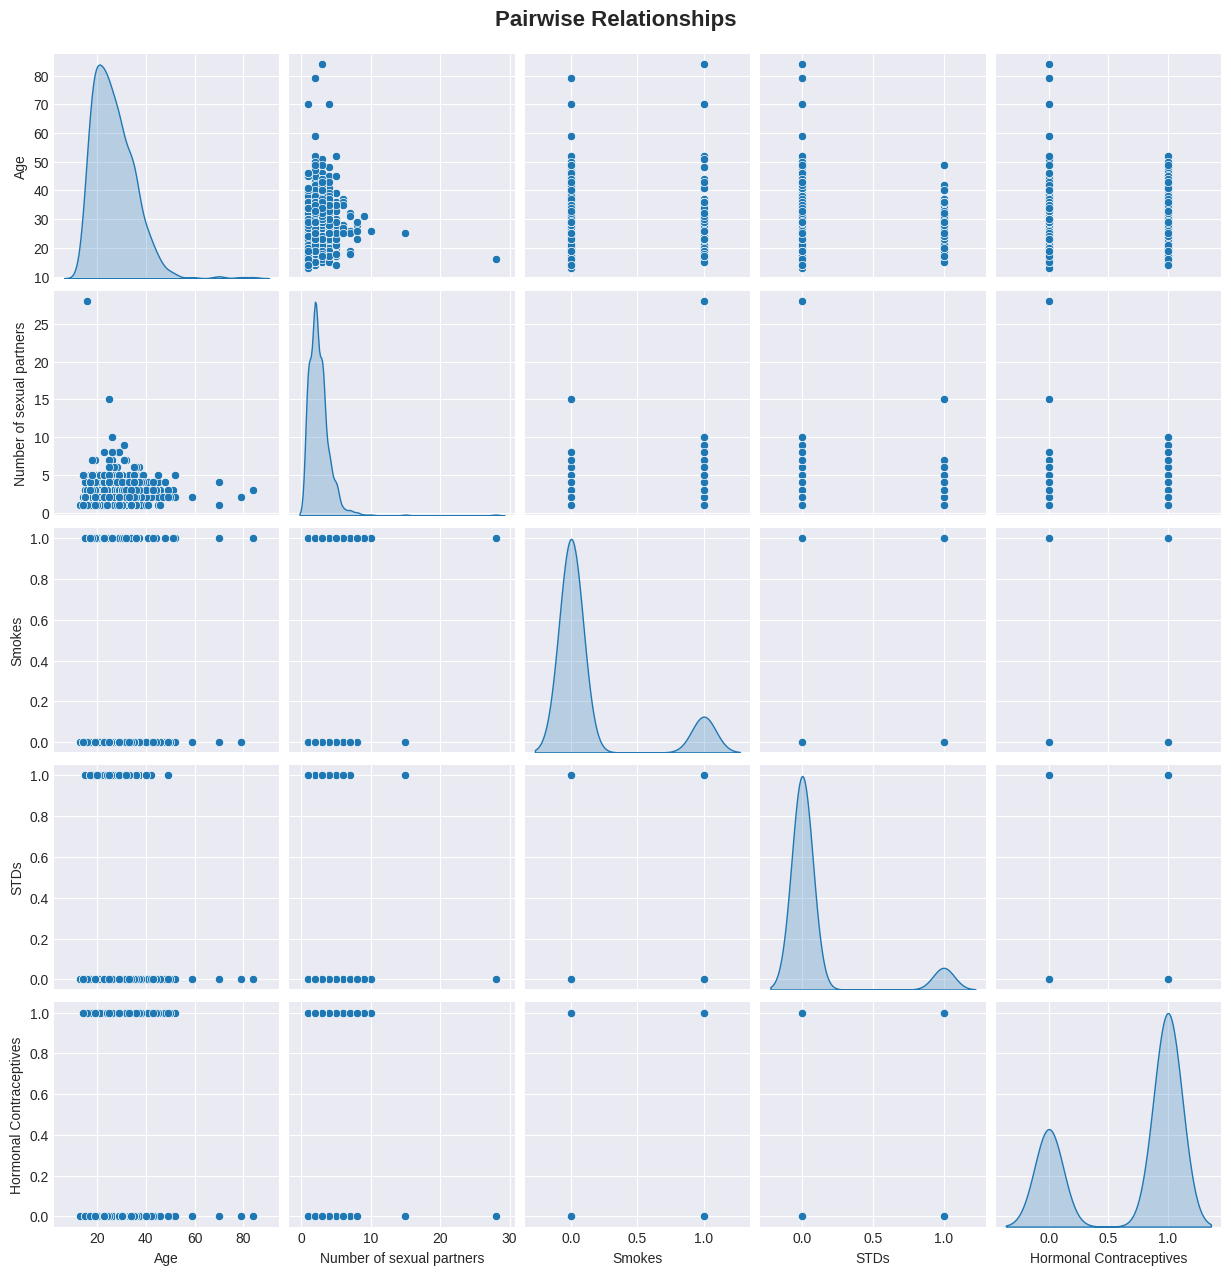

In [73]:
# Plot scatter plots for pairwise relationships
sns.pairplot(selected_df, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02, fontsize=16, weight='bold')
plt.show()

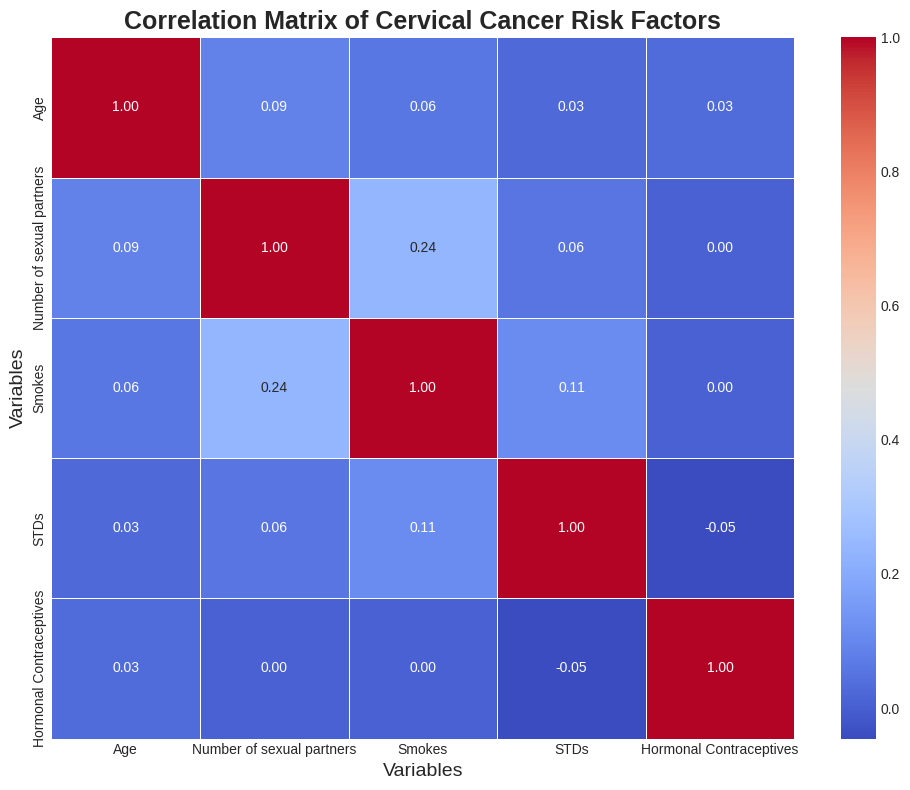

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Cervical Cancer Risk Factors', fontsize=18, weight='bold')

plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.tight_layout()
plt.show()


In [81]:
print("Summary of Correlations:")
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        variable1 = correlation_matrix.index[i]
        variable2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if correlation > 0:
            print(f"The correlation between '{variable1}' and '{variable2}' is positive: {correlation:.2f}")
        elif correlation < 0:
            print(f"The correlation between '{variable1}' and '{variable2}' is negative: {correlation:.2f}")


Summary of Correlations:
The correlation between 'Age' and 'Number of sexual partners' is positive: 0.09
The correlation between 'Age' and 'Smokes' is positive: 0.06
The correlation between 'Age' and 'STDs' is positive: 0.03
The correlation between 'Age' and 'Hormonal Contraceptives' is positive: 0.03
The correlation between 'Number of sexual partners' and 'Smokes' is positive: 0.24
The correlation between 'Number of sexual partners' and 'STDs' is positive: 0.06
The correlation between 'Number of sexual partners' and 'Hormonal Contraceptives' is positive: 0.00
The correlation between 'Smokes' and 'STDs' is positive: 0.11
The correlation between 'Smokes' and 'Hormonal Contraceptives' is positive: 0.00
The correlation between 'STDs' and 'Hormonal Contraceptives' is negative: -0.05


# **Exploratory Data Analysis (EDA) in Linear Regression Analysis of Cervical Cancer and Correlation Summary**

1. **Age and Sexual Behavior**:
   - A weak positive correlation is observed between Age and the Number of sexual partners (0.09). This implies that, on average, older individuals tend to have slightly more sexual partners. Means that this is not that significant

2. **Age and Lifestyle Factors**:
   - There is a weak positive correlation between Age and Smokes (0.06). Additionally, weak positive correlations exist between Age and the STDs (0.03) and Hormonal Contraceptives (0.03). These correlations suggest that between Age and lifestyle factors are not highly influential/significant.

3. **Sexual Behavior and Lifestyle Choices**:
   - A moderate positive correlation is found between the Number of sexual partners and Smokes (0.24). This suggests relationship with more sexual partners are more likely to smoke, and vice versa.

4. **STDs and Contraceptive Use**:
   - A weak positive correlation is observed between Smokes and STDs (0.11). however in the opposite there is a weak negative correlation exists between STDs and Hormonal Contraceptives (-0.05). These findings between STD status, contraceptive choices, and lifestyle factors gave us insight on how impactful it is in cervical cancer risk.


##**indicate better model performance**

In [121]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [122]:
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)
y = iris.data[:, 3]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
model = LinearRegression()

In [125]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model.predict(X_test)

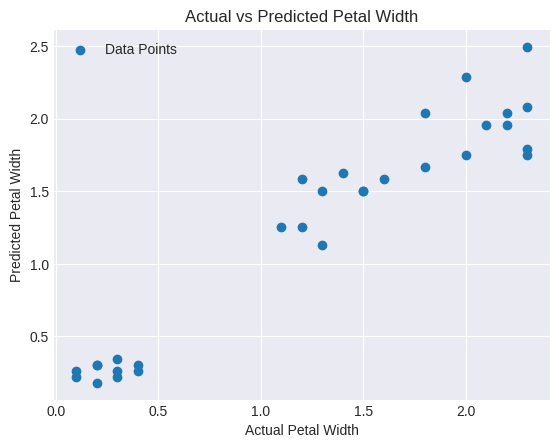

In [127]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred, label='Data Points')
plt.xlabel('Actual Petal Width')
plt.ylabel('Predicted Petal Width')
plt.title('Actual vs Predicted Petal Width')


plt.legend()

plt.show()



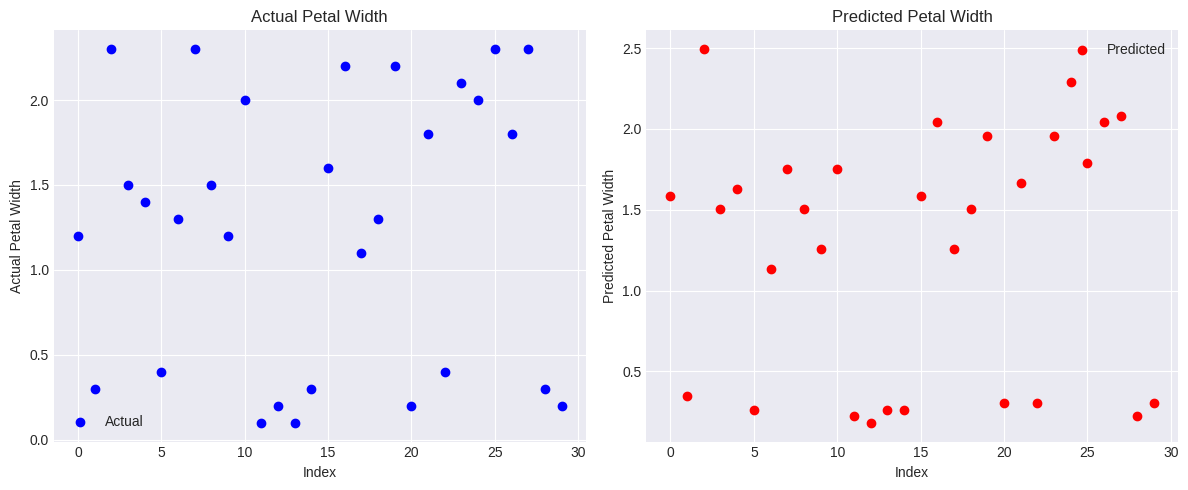

In [128]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Actual Petal Width
ax1.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual Petal Width')
ax1.set_title('Actual Petal Width')
ax1.legend()

# Plot for Predicted Petal Width
ax2.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Predicted Petal Width')
ax2.set_title('Predicted Petal Width')
ax2.legend()

plt.tight_layout()
plt.show()


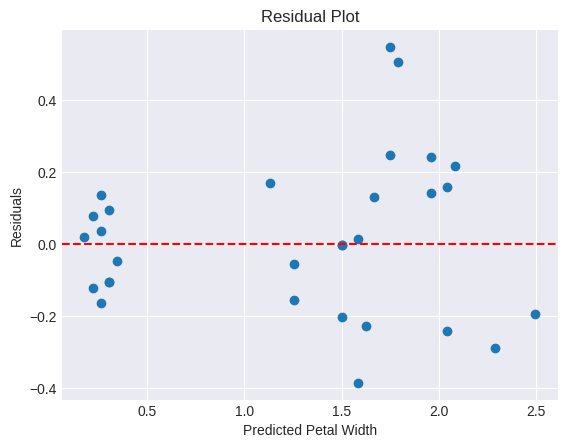

In [129]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Residual
* A well-performing model will have residuals scattered randomly around zero (the red dashed line).

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print summary
print("Summary of Actual vs. Predicted Values:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Summary of Actual vs. Predicted Values:
Mean Squared Error (MSE): 0.05
R-squared: 0.93


## Mean Squared Error (MSE):
* A lower MSE indicates better accuracy. <br>


## R-squared (R²):
* Higher R-squared values closer to 1 signify a better fit of the model to the data.